✅ Extracted text length: 29182 characters
✅ Chunk size 500: 98 chunks created
✅ Chunk size 800: 53 chunks created
✅ Chunk size 1000: 38 chunks created


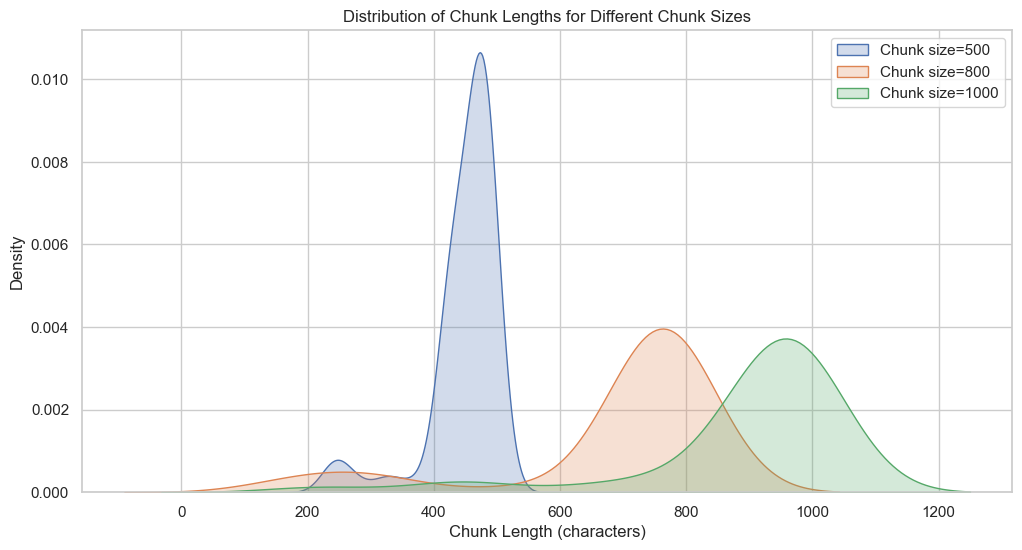

/var/folders/4f/3kkpfrvj36l44smm9z3jpzq80000gn/T/ipykernel_67020/3809017853.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[stat["chunk_size"] for stat in chunk_stats],


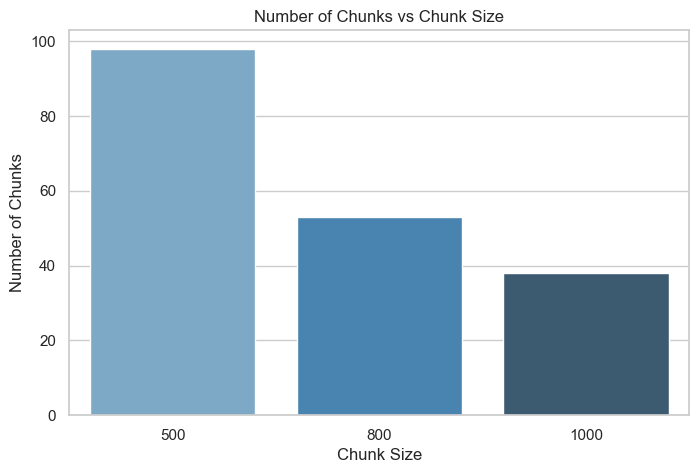

,Chunk Size,Num Chunks,Avg Chunk Length,Min Chunk Length,Max Chunk Length
0,500,98,447.6,238,499
1,800,53,689.1,153,799
2,1000,38,893.4,220,998


In [ ]:
# ===========================
# EDA for PDF Chunking Sizes
# ===========================


import os
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import pdfplumber
from PyPDF2 import PdfReader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# ---------------------------
# PDF Extraction
# ---------------------------
PDF_PATH = "/Users/feepieper/Desktop/AI_project_module6/sample_data/sample_research_paper/30-39.pdf"

def extract_pdf_text(pdf_path: str) -> str:
    """Extract text from PDF using pdfplumber."""
    text_parts = []
    with pdfplumber.open(pdf_path) as pdf:
        for page_num, page in enumerate(pdf.pages, start=1):
            text = page.extract_text()
            if text:
                text_parts.append(text)
    return "\n\n".join(text_parts)

full_text = extract_pdf_text(PDF_PATH)
print(f"✅ Extracted text length: {len(full_text)} characters")

# ---------------------------
# Chunking Function
# ---------------------------
def chunk_text(text: str, chunk_size: int, chunk_overlap: int = 200) -> List[str]:
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len,
        separators=["\n\n", "\n", ". ", " ", ""]
    )
    return splitter.split_text(text)

# ---------------------------
# Compare Different Chunk Sizes
# ---------------------------
chunk_sizes = [500, 800, 1000]
chunk_overlap = 200

chunk_stats = []

for size in chunk_sizes:
    chunks = chunk_text(full_text, chunk_size=size, chunk_overlap=chunk_overlap)
    lengths = [len(c) for c in chunks]
    
    chunk_stats.append({
        "chunk_size": size,
        "num_chunks": len(chunks),
        "avg_chunk_length": sum(lengths)/len(lengths),
        "min_chunk_length": min(lengths),
        "max_chunk_length": max(lengths),
        "chunk_lengths": lengths
    })
    print(f"✅ Chunk size {size}: {len(chunks)} chunks created")

# ---------------------------
# Visualization
# ---------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

for stat in chunk_stats:
    sns.kdeplot(stat["chunk_lengths"], label=f'Chunk size={stat["chunk_size"]}', fill=True)

plt.title("Distribution of Chunk Lengths for Different Chunk Sizes")
plt.xlabel("Chunk Length (characters)")
plt.ylabel("Density")
plt.legend()
plt.show()

# ---------------------------
# Number of Chunks vs Chunk Size
# ---------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=[stat["chunk_size"] for stat in chunk_stats],
            y=[stat["num_chunks"] for stat in chunk_stats],
            palette="Blues_d")
plt.title("Number of Chunks vs Chunk Size")
plt.xlabel("Chunk Size")
plt.ylabel("Number of Chunks")
plt.show()

# ---------------------------
# Summary Table
# ---------------------------
import pandas as pd

summary_df = pd.DataFrame([{
    "Chunk Size": stat["chunk_size"],
    "Num Chunks": stat["num_chunks"],
    "Avg Chunk Length": round(stat["avg_chunk_length"], 1),
    "Min Chunk Length": stat["min_chunk_length"],
    "Max Chunk Length": stat["max_chunk_length"]
} for stat in chunk_stats])

summary_df


In [3]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.9 MB/s  0:00:01 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.8 MB/s  0:00:00 eta 0:00:01
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
